<a href="https://colab.research.google.com/github/H-99-R/PSSM/blob/main/Keyword_Extraction_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Keyword Extraction Methods from Documents in NLP**


*   Rake_NLTK
*   Spacy
* Word cloud
* KeyBert
* Yake
* gensimI










## Rake_NLTK



In [ ]:
!pip install rake_nltk

In [ ]:
from rake_nltk import Rake
r = Rake()
my_text = """
When it comes to evaluating the performance of keyword extractors, you can use some of the standard metrics in 
machine learning: accuracy, precision, recall, and F1 score. However, these metrics don’t reflect partial matches;
they only consider the perfect match between an extracted segment and the correct prediction for that tag.
Fortunately, there are some other metrics capable of capturing partial matches. An example of this is ROUGE.
"""
r.extract_keywords_from_text(my_text)
keywordList= []
rankedList= r.get_ranked_phrases_with_scores()
for keyword in rankedList:
  keyword_updated       = keyword[1].split()
  keyword_updated_string    = " ".join(keyword_updated[:2])
  keywordList.append(keyword_updated_string)
  if(len(keywordList)>5):
    break
print(keywordList)

['reflect partial', 'capturing partial', 'perfect match', 'machine learning', 'keyword extractors', 'f1 score']


In [ ]:
r.get_ranked_phrases_with_scores()

[(9.0, 'reflect partial matches'),
 (9.0, 'capturing partial matches'),
 (4.0, 'perfect match'),
 (4.0, 'machine learning'),
 (4.0, 'keyword extractors'),
 (4.0, 'f1 score'),
 (4.0, 'extracted segment'),
 (4.0, 'correct prediction'),
 (3.666666666666667, 'standard metrics'),
 (3.666666666666667, 'metrics capable'),
 (1.6666666666666667, 'metrics'),
 (1.0, '’'),
 (1.0, 'use'),
 (1.0, 'tag'),
 (1.0, 'rouge'),
 (1.0, 'recall'),
 (1.0, 'precision'),
 (1.0, 'performance'),
 (1.0, 'however'),
 (1.0, 'fortunately'),
 (1.0, 'example'),
 (1.0, 'evaluating'),
 (1.0, 'consider'),
 (1.0, 'comes'),
 (1.0, 'accuracy')]

##   Spacy


In [ ]:
!pip3 install spacy

In [ ]:
import spacy
from collections import Counter
from string import punctuation
nlp = spacy.load("en_core_web_sm")
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN'] 
    doc = nlp(text.lower()) 
    for token in doc:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        if(token.pos_ in pos_tag):
            result.append(token.text)
    return result
new_text = """
When it comes to evaluating the performance of keyword extractors, you can use some of the standard metrics in machine learning: accuracy, precision, recall, and F1 score. However, these metrics don’t reflect partial matches. they only consider the perfect match between an extracted segment and the correct prediction for that tag.
Fortunately, there are some other metrics capable of capturing partial matches. An example of this is ROUGE.
"""
output = set(get_hotwords(new_text))
most_common_list = Counter(output).most_common(10)
for item in most_common_list:
  print(item[0])

recall
perfect
f1
match
score
precision
prediction
correct
keyword
partial


## Word Cloud


In [ ]:
!pip3 install wordcloud
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

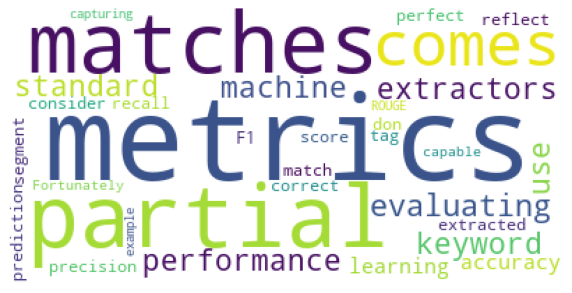

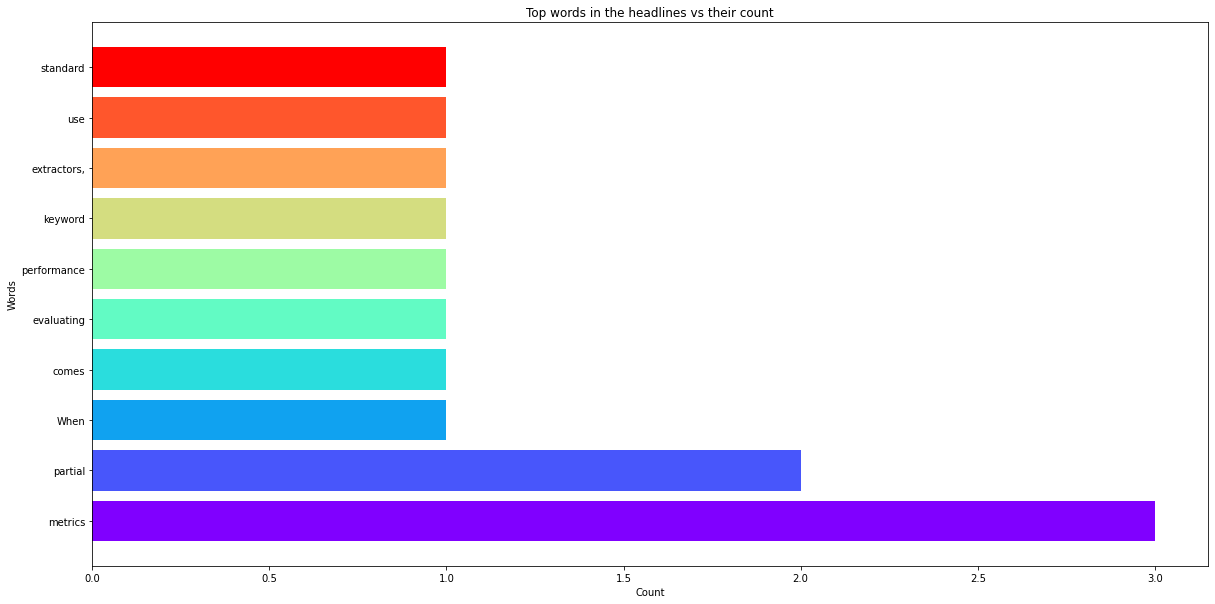

In [ ]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
all_headlines = """
When it comes to evaluating the performance of keyword extractors, you can use some of the standard metrics in machine learning:
accuracy, precision, recall, and F1 score. However, these metrics don’t reflect partial matches; they only consider
the perfect match between an extracted segment and the correct prediction for that tag.
Fortunately, there are some other metrics capable of capturing partial matches. An example of this is ROUGE.
"""
stopwords = STOPWORDS
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_headlines)
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
filtered_words = [word for word in all_headlines.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)
words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10
plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)
plt.show()




## keybert



In [ ]:
!pip3 install keybert


In [ ]:
from keybert import KeyBERT
doc = """
         Supervised learning is the machine learning task of learning a function that
         maps an input to an output based on example input-output pairs. It infers a
         function from labeled training data consisting of a set of training examples.
         In supervised learning, each example is a pair consisting of an input object
         (typically a vector) and a desired output value (also called the supervisory signal). 
         A supervised learning algorithm analyzes the training data and produces an inferred function, 
         which can be used for mapping new examples. An optimal scenario will allow for the 
         algorithm to correctly determine the class labels for unseen instances. This requires 
         the learning algorithm to generalize from the training data to unseen situations in a 
         'reasonable' way (see inductive bias)."""
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc)
print(keywords)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

[('supervised', 0.6676), ('labeled', 0.4896), ('learning', 0.4813), ('training', 0.4134), ('labels', 0.3947)]


### yake

In [ ]:
!pip3 install yake

In [ ]:
import yake
doc = """
         Supervised learning is the machine learning task of learning a function that
         maps an input to an output based on example input-output pairs. It infers a
         function from labeled training data consisting of a set of training examples.
         In supervised learning, each example is a pair consisting of an input object
         (typically a vector) and a desired output value (also called the supervisory signal). 
         A supervised learning algorithm analyzes the training data and produces an inferred function, 
         which can be used for mapping new examples. An optimal scenario will allow for the 
         algorithm to correctly determine the class labels for unseen instances. This requires 
         the learning algorithm to generalize from the training data to unseen situations in a 
         'reasonable' way (see inductive bias)."""

keywords = yake.KeywordExtractor(lan="en", n=3, windowsSize=3, top=9).extract_keywords(doc)
results = []
for scored_keywords in keywords:
    for keyword in scored_keywords:
         if isinstance(keyword, str):
            results.append(keyword) 
results 

['machine learning task',
 'learning',
 'Supervised learning',
 'maps an input',
 'input-output pairs',
 'output based',
 'training data',
 'machine learning',
 'learning task']

### gensim

In [ ]:
import gensim
text = "Non-negative matrix factorization (NMF) has previously been shown to " + \
"be a useful decomposition for multivariate data. Two different multiplicative " + \
"algorithms for NMF are analyzed. They differ only slightly in the " + \
"multiplicative factor used in the update rules. One algorithm can be shown to " + \
"minimize the conventional least squares error while the other minimizes the  " + \
"generalized Kullback-Leibler divergence. The monotonic convergence of both  " + \
"algorithms can be proven using an auxiliary function analogous to that used " + \
"for proving convergence of the Expectation-Maximization algorithm. The algorithms  " + \
"can also be interpreted as diagonally rescaled gradient descent, where the  " + \
"rescaling factor is optimally chosen to ensure convergence."
gensim.summarization.keywords(text, 
         ratio=0.5,               # use 50% of original text
         words=None,              # Number of returned words
         split=True,              # Whether split keywords
         scores=False,            # Whether score of keyword
         pos_filter=('NN', 'JJ'), # Part of speech (nouns, adjectives etc.) filters
         lemmatize=True,         # If True - lemmatize words
         deacc=True)              # If True - remove accentuation

['factor', 'convergence', 'rescaling', 'multiplicative', 'function']